## Data cleaning

In [140]:
import seaborn as sns 
import pandas as pd 
import matplotlib.pyplot as plt 

In [141]:
df_steps = pd.read_csv('steps.csv', sep=';')
df_steps.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,3914.0,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [142]:
df_survey = pd.read_csv('survey.csv')

df_survey.head()
df_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 929 entries, 0 to 928
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           929 non-null    int64  
 1   city         929 non-null    object 
 2   gender       929 non-null    object 
 3   age          929 non-null    object 
 4   hh_size      929 non-null    int64  
 5   education    929 non-null    int64  
 6   education_1  929 non-null    object 
 7   height       928 non-null    float64
 8   weight       927 non-null    float64
dtypes: float64(2), int64(3), object(4)
memory usage: 65.4+ KB


In [143]:
df = pd.merge(df_survey, df_steps, on = 'id')
df.head()



,id,city,gender,age,hh_size,education,education_1,height,weight,20-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,NaN,...,3914.0,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='height', ylabel='weight'>

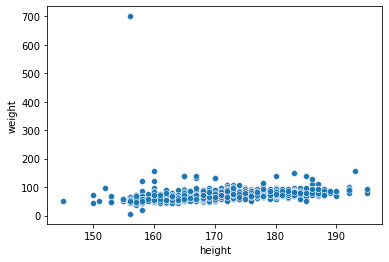

In [144]:
## Plotting height and weight to find outliers
sns.scatterplot(data=df, x="height", y="weight")

Looks like there is on value for weight that is likely incorrect.

In [145]:
## removing weight values above 600
def above_600(x):
    if(x > 600): 
        return float('NaN')
    else: 
        return x
    
df['weight'] = df['weight'].apply(above_600)

<AxesSubplot:xlabel='height', ylabel='weight'>

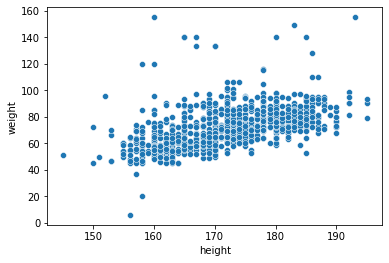

In [146]:
sns.scatterplot(data=df, x="height", y="weight")

In [147]:
df['mean_steps'] = df.iloc[:, 9:].mean(axis=1).round(0)

df.head()

,id,city,gender,age,hh_size,education,education_1,height,weight,20-6-2013,...,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014,mean_steps
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10206.0
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5687.0
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,NaN,...,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN,8302.0
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3633.0
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5312.0


## Exploratory data analysis

<AxesSubplot:xlabel='mean_steps'>

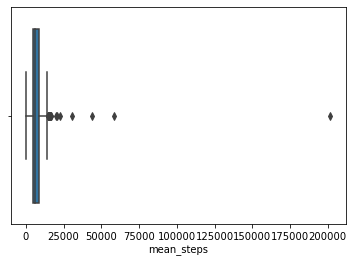

In [148]:
sns.boxplot(x=df["mean_steps"])

Let's delete the outliers

In [149]:
## removing weight values above 30k
def above_30k(x):
    if(x > 30000): 
        return float('NaN')
    else: 
        return x
    
df['mean_steps'] = df['mean_steps'].apply(above_30k)

Let's calculate the mean and median steps

In [150]:
average = df['mean_steps'].mean()
print("The average steps = " + str(average))

median = df['mean_steps'].median()
print("The middle value = " + str(median))


The average steps = 6703.99891422367
The middle value = 6240.0


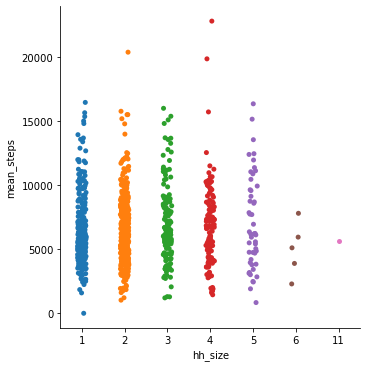

In [151]:
sns.catplot(x="hh_size", y="mean_steps", data=df)
plt.show()

In the categorical scatterplots above we can see that household size does not have much impact on average steps.

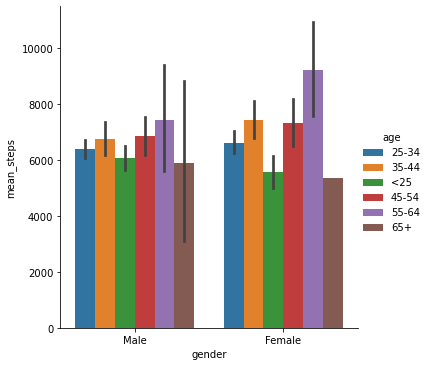

In [152]:
sns.catplot(x="gender", y="mean_steps", hue="age", kind="bar", data=df)


In this graph we can see that female participants in the age group 55-64 took much more steps on avergae than their male counterparts. Participants aged 65 and older took the least steps in when compared to other participants of the same gender. 

## Feature engineering

Adding BMI to give a better indication of a healthy weight

In [153]:
df['BMI']= (df['weight'] / (df['height'] * df['height']) )*10000
df['BMI'] = round(df['BMI'],1)

## removing bmi values under 10
def under_10(x):
    if(x < 10): 
        return float('NaN')
    else: 
        return x
    
df['BMI'] = df['BMI'].apply(under_10)

## Exploratory data analysis

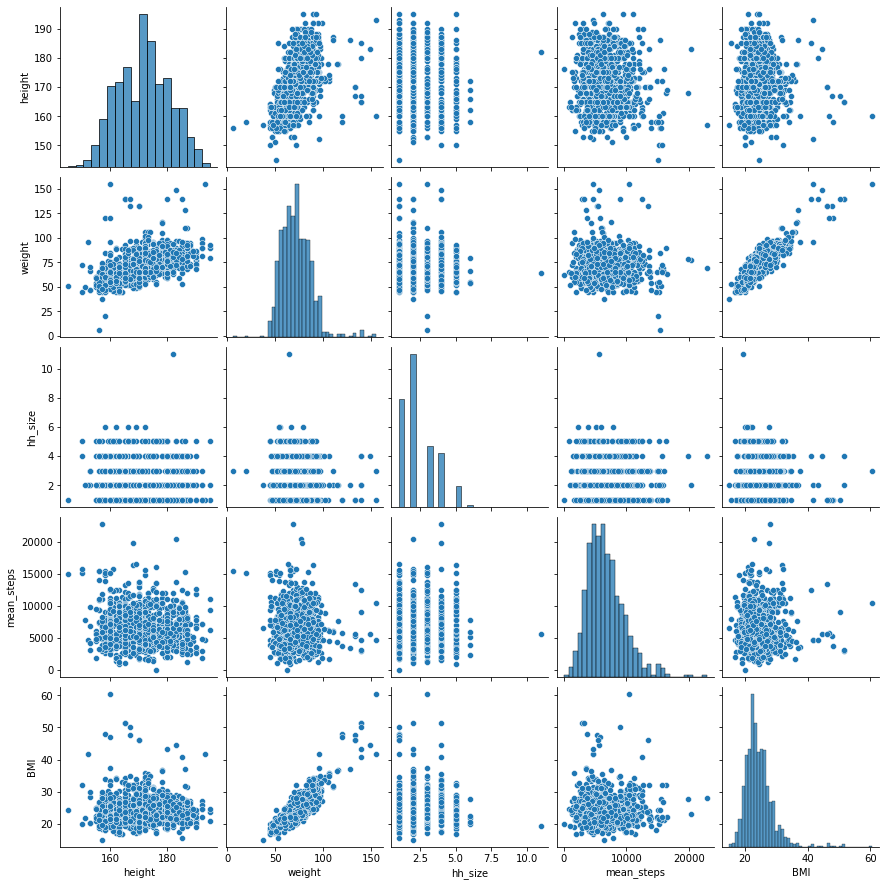

In [154]:
df_numerical = df[['height','weight','hh_size','mean_steps', 'BMI']]
sns.pairplot(df_numerical)
plt.show()

There are no correlations with mean steps.

/Users/dominykabortnikaite/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


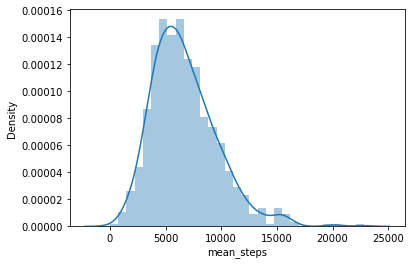

/Users/dominykabortnikaite/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


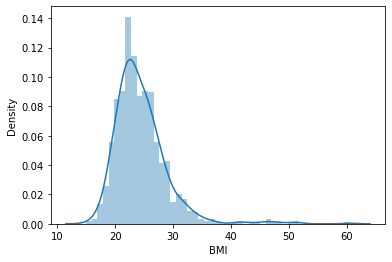

In [155]:
sns.distplot(df['mean_steps'])
plt.show()
sns.distplot(df['BMI'])
plt.show()

We can see that most people took around 6k steps and 24 was the most common BMI

## Adding dummy variables

In [156]:
dummies = pd.get_dummies(df["gender"])
dummies

,Female,Male
0,0,1
1,0,1
2,0,1
3,0,1
4,1,0
...,...,...
924,1,0
925,0,1
926,0,1
927,1,0


In [157]:
from scipy.stats.stats import pearsonr 

df.dropna(subset = ["mean_steps"], inplace=True)
df.dropna(subset = ["BMI"], inplace=True)

print(pearsonr(df['mean_steps'],df['BMI']))
print(pearsonr(df['mean_steps'],df['hh_size']))

(-0.025265216834075507, 0.4452702842985467)
(0.03753397925094541, 0.25670573757977927)


Steps and BMI are negatively correlated (r = -0.025).
The correlation is not significant (p = 0.44)

Steps and household size are positively correlated (r = 0.037).
The correlation is not significant (p = 0.26)

In [158]:
corr = df[['mean_steps', 'BMI', 'hh_size', 'weight', "Female", "Male"]].corr() 
corr

KeyError: "['Female', 'Male'] not in index"

In [ ]:
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns) 
plt.show()

There's no meaningful correlation between anything, besides the obvious - BMI and weight.

## Predictive model

In [ ]:
import sklearn as sk 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
y = df['mean_steps'] 
X = df[['height', 'weight', 'hh_size', "Female", "Male"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

lm = LinearRegression() 
model = lm.fit(X_train, y_train) 
y_test_p = lm.predict(X_test) 
X_train.head() 

Creating dummy variables:

In [ ]:
df = pd.concat([df, dummies], axis=1)
df.dropna(subset = ["Female"], inplace=True)
df.dropna(subset = ["Male"], inplace=True)
df

In [ ]:
y = df['mean_steps'] #We need to take out the rating as our Y-variable
X = df[["weight", "BMI",'Female','Male']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) #split the data, store it into different variables

lm = LinearRegression() #create the model
model = lm.fit(X_train, y_train) #train the model
y_test_p = lm.predict(X_test) #Generate predictions for the test data. So we use X.test, not X.train
X_train.head() #The train data


## Evaluation

In [ ]:
sns.scatterplot(y_test, y_test_p)
plt.xlabel('Actual steps')
plt.ylabel('Predicted steps')
plt.title('Actual vs. predicted')
plt.xlim([2000,15000]) #Forcing the x- and y-axis to be the same length, so that we can compare 
plt.ylim([2000,15000])
plt.plot([2000, 15000], [2000, 15000], color='red', lw=3) #Plot a diagonal length
plt.show()

 Model can't predict steps 

In [ ]:
from sklearn.metrics import r2_score

r2_score(y_test, y_test_p) 

R2 is 0.005, meaning the model can only predict 0,5% of variation.

In [ ]:
import math
from sklearn.metrics import mean_squared_error

math.sqrt(mean_squared_error(y_test, y_test_p))

The RMSE is 3031, which means that the model is typically of by about 3031 steps.

## Conclusion


The model is useless. Mean steps can not be predicted from weight, BMI and gender